In [10]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import numpy as np
# from scipy.ndimage import gaussian_filter
from skimage.restoration import richardson_lucy
import scipy.signal

### Loading the MNIST Dataset

In [11]:
training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

print("Length of Training Data:", len(training_data))
print("Length of Training Data:", len(test_data))

Length of Training Data: 60000
Length of Training Data: 10000


### Blurring the image using the Gaussian Filter

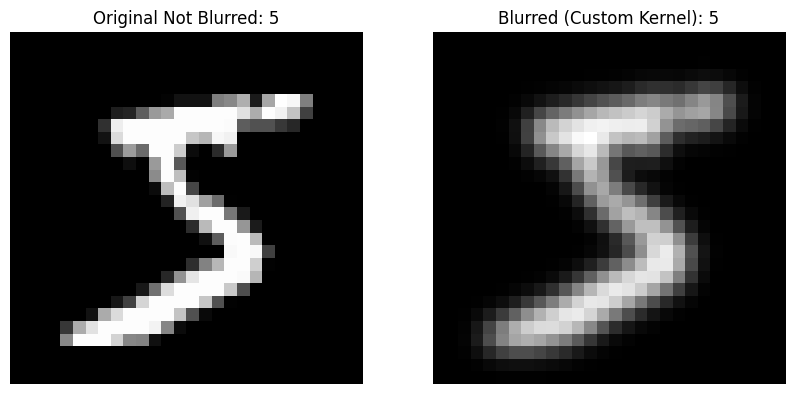

In [13]:
image, label = training_data[0]
image = image.squeeze().numpy()

def gaussian_kernel(size, sigma):
    ax = np.linspace(-(size // 2), size // 2, size)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-(xx**2 + yy**2) / (2. * sigma**2))
    return kernel / np.sum(kernel)

# create PSF and blur the image
side = 9 
psf = gaussian_kernel(size=side, sigma=1.0)

blurred = scipy.signal.convolve2d(image, psf, mode='same', boundary='symm')

blurred_tensor = torch.tensor(blurred).unsqueeze(0)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(image, cmap='gray')
axes[0].set_title(f'Original Not Blurred: {label}')
axes[0].axis('off')

axes[1].imshow(blurred, cmap='gray')
axes[1].set_title(f'Blurred (Custom Kernel): {label}')
axes[1].axis('off')

plt.show()

### Deconvolution using Richardson Lucy

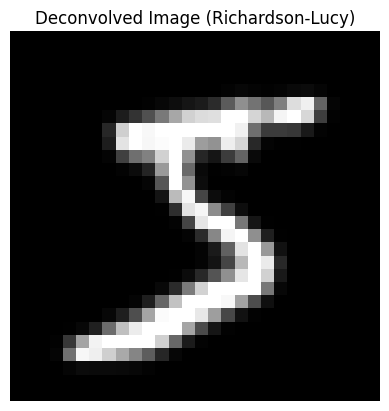

In [14]:
deconvolved = richardson_lucy(blurred, psf, num_iter=30)
plt.imshow(deconvolved, cmap='gray')
plt.title('Deconvolved Image (Richardson-Lucy)')
plt.axis('off')
plt.show()